<a href="https://colab.research.google.com/github/IhsanTafaquh-coder-dev/Kelompok-f/blob/main/Kelompok_f%20tugas%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving kelulusanMahasiswa.csv to kelulusanMahasiswa (10).csv
Contoh data:
   STUDENT ID  1  2  3  4  5  6  7  8  9  ...  23  24  25  26  27  28  29  30  \
0   STUDENT1  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   1   2   1   1   
1   STUDENT2  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   3   2   2   3   
2   STUDENT3  2  2  2  3  2  2  2  2  4  ...   1   1   2   2   1   1   2   2   
3   STUDENT4  1  1  1  3  1  2  1  2  1  ...   1   2   3   2   2   1   3   2   
4   STUDENT5  2  2  1  3  2  2  1  3  1  ...   2   1   2   2   2   1   2   2   

   COURSE ID  GRADE  
0          1      1  
1          1      1  
2          1      1  
3          1      1  
4          1      1  

[5 rows x 33 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2   

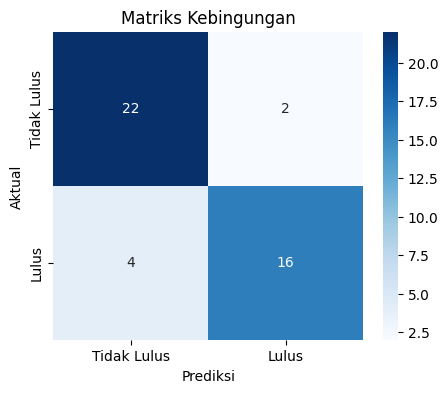

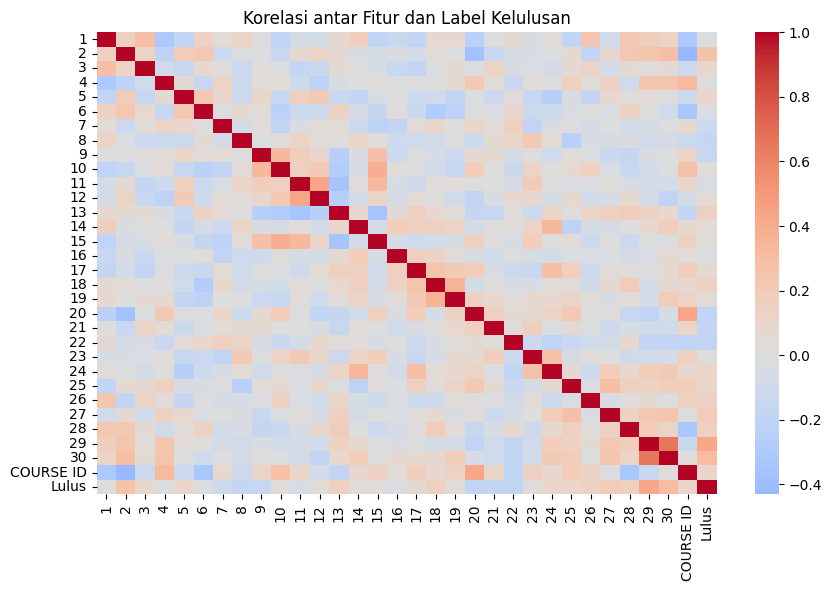

In [21]:
from google.colab import files
uploaded = files.upload()  # Upload manual file kelulusanMahasiswa.csv

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset (ganti nama file sesuai yang kamu upload)
df = pd.read_csv("kelulusanMahasiswa.csv")

# Tampilkan 5 data teratas dan info dataset
print("Contoh data:\n", df.head())
print("\nInfo dataset:")
print(df.info())

# Cek distribusi nilai GRADE
print("\nDistribusi GRADE:")
print(df['GRADE'].value_counts())

# Ubah threshold jadi lebih fleksibel, misal > 2 (bisa kamu ubah sesuai kebutuhan)
df['Lulus'] = (df['GRADE'] > 2).astype(int)

# Cek distribusi label Lulus
print("\nDistribusi label Lulus (setelah threshold > 2):")
print(df['Lulus'].value_counts())

# Pilih fitur kolom 1 sampai 30 + 'COURSE ID' (asumsi 'COURSE ID' berpengaruh)
fitur = [str(i) for i in range(1, 31)] + ['COURSE ID']
X = df[fitur]
y = df['Lulus']

# Scaling fitur biar nilai beda skala gak ganggu model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data train dan test (70% train, 30% test)
X_latih, X_uji, y_latih, y_uji = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Hyperparameter tuning pakai GridSearchCV (hapus 'auto' karena deprecated)
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # FIX: no 'auto'
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_latih, y_latih)

print("\n✅ Best parameters dari Grid Search:")
print(grid_search.best_params_)

# Pakai model terbaik hasil tuning
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_uji)

# Evaluasi model terbaik
print("\n🧠 Matriks Kebingungan:")
print(confusion_matrix(y_uji, y_pred))

print("\n📊 Laporan Klasifikasi:")
print(classification_report(y_uji, y_pred, target_names=["Tidak Lulus", "Lulus"]))

print("\n🎯 Akurasi Model: {:.2f}%".format(accuracy_score(y_uji, y_pred) * 100))

# Visualisasi Confusion Matrix
cm = confusion_matrix(y_uji, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Lulus', 'Lulus'],
            yticklabels=['Tidak Lulus', 'Lulus'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Matriks Kebingungan')
plt.show()

# Visualisasi Korelasi antar fitur dan target
plt.figure(figsize=(10,6))
sns.heatmap(df[fitur + ['Lulus']].corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Korelasi antar Fitur dan Label Kelulusan")
plt.show()
